In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('../Style.mplstyle')
import pandas as pd
import os
import sys
from matplotlib.ticker import FuncFormatter
import time
from datetime import datetime
import matplotlib.dates as mdates
import linecache
from iminuit import Minuit 
sys.path.append('..')
from read_data_functions import *
from plot_functions import *
from Laura import *
from calculations import *

In [86]:
#Read CPC data 

parent = '../../Lund/CPC' 
names = ['test1_CPC', 'test2_CPC', 'test3_CPC', 'test4_CPC', 'test5_CPC', 'test6_CPC', 'test7_CPC', 'test8_CPC', 'test9_CPC', 'test10_CPC', 'test11_CPC']

data_CPC = read_CPC(parent) 

c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\Laura.py:29: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\Laura.py:29: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\Laura.py:29: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\Laura.py:29: UserWarning: C

c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:116: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon = False)
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:116: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon = False)
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:116: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon = False)
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:116: UserWarning: No artists with labels found to put in leg

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased: bool
  backgroundcolor: :mpltype:`color`
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: :mpltype:`color`
  figure: `~matplotlib.figure.Figure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'ext

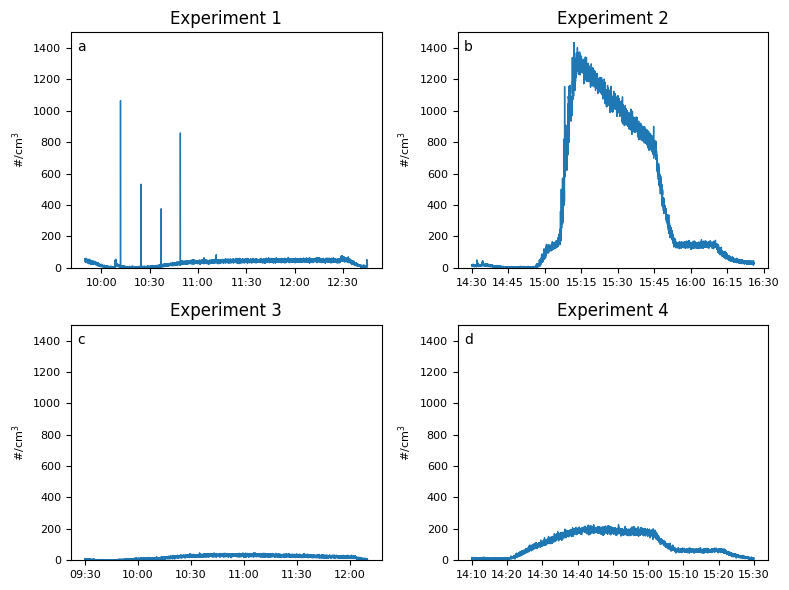

In [87]:
# Plot CPC timeseries

Timestamps_CPC = [['09:50:00', '12:50:00'],
                  ['14:30:00', '16:30:00'],
                  ['09:30:00', '12:10:00'],
                  ['14:10:00', '15:30:00']] 

CPC_dict_keys = ['test7_CPC', 'test8_CPC', 'test9_CPC', 'test10_CPC'] 


fig, axes = plt.subplots(2, 2, figsize = (8, 6))

for i, key in enumerate(CPC_dict_keys):
    if i == 0:
        ax = axes[0][0]
    if i == 1:
        ax = axes[0][1]
    if i == 2:
        ax = axes[1][0]
    if i == 3:
        ax = axes[1][1]



    plot_LCS_single(ax, data_CPC, CPC_dict_keys[i], Timestamps_CPC[i][0], Timestamps_CPC[i][1], data_CPC['test7_CPC'].keys()[1], '#/cm$^3$', 'Time', None)

    ax.set_ylim(0, 1500)
    
    title = 'Experiment ' + str(i + 1)
    ax.set_title(title)

sublabels = ['a', 'b', 'c', 'd']
for ax, l in zip(axes.flatten(), sublabels):
    ax.text(0.02, 0.92, l, transform = ax.transAxes, fontsize = 10)

fig.tight_layout()
fig.savefig('Timeseries_CPC.png', dpi = 600)


In [88]:
# Mean conc for CPC

timestamps_exp = np.array([['10:45:00', '12:26:00'],
                  ['15:00:00', '15:34:00'],
                  ['10:20:00', '12:00:00'],
                  ['14:30:00', '15:00:00']], dtype = object)


dm_nørreport = get_mean_conc(data_CPC, ['test7_CPC', 'test8_CPC', 'test9_CPC', 'test10_CPC'], 'Time', timestamps_exp,  data_CPC['test10_CPC'].keys()[1], 'CPC_mean_conc.csv')
display(dm_nørreport)

[ 4343. 10403.]
[3887. 5927.]
[3577. 9577.]
[4319. 6119.]


,test7_CPC time start,test7_CPC time end,test7_CPC,test8_CPC time start,test8_CPC time end,test8_CPC,test9_CPC time start,test9_CPC time end,test9_CPC,test10_CPC time start,test10_CPC time end,test10_CPC
0,2024-11-21 10:45:00,2024-11-21 12:26:00,42.491914,2024-11-21 15:00:00,2024-11-21 15:34:00,893.570588,2024-11-21 10:20:00,2024-11-21 12:00:00,27.960833,2024-11-21 14:30:00,2024-11-21 15:00:00,174.663333


In [89]:
# read LCS data: KU 

parent = '../../Lund/LCS_vores' 
names = ['DG-0051', 'DG-0049']

data_LCS_KU = read_LCS_KU_data(parent, 'timestamp', names) 
display(data_LCS_KU['DG-0049'])

,Unnamed: 0,timestamp,ALEC1_AE1,ALEC1_AE2,ALEC1_WE1,ALEC1_WE2,ALEC1_dV1,ALEC3_AE1,ALEC3_AE2,ALEC3_WE1,...,SPS30_PM2.5,SPS30_PM4,VEML6040_AL,VEML6040_Blue,VEML6040_ColorTemp,VEML6040_Green,VEML6040_RED,VEML6040_White,continuousMessages,dTS_RC_Cli
0,0,15/10/2024 11:00:34,1.860890,0.570109,0.329986,0.596958,-1.5309,0.778325,1.204154,0.754778,...,0.831256,0.975235,12.093225,90,27296,371,586,758,0,-1742742202836
1,1,15/10/2024 11:01:34,1.746233,0.570177,0.624072,0.596072,-1.1222,0.994914,1.237742,0.971687,...,0.595875,0.700722,12.066340,94,35527,374,588,763,1,-1742742203093
2,2,15/10/2024 11:02:34,1.693946,0.570511,0.740895,0.595509,-0.9531,1.085269,1.259128,1.056064,...,0.580729,0.681472,11.800362,94,34313,365,584,756,2,-1742742203737
3,3,15/10/2024 11:03:34,1.654284,0.570409,0.813692,0.595284,-0.8406,1.134775,1.273144,1.104163,...,0.642818,0.746968,11.910522,92,35714,364,583,757,3,-1742742203734
4,4,15/10/2024 11:04:34,1.619170,0.570642,0.866410,0.595228,-0.7528,1.171628,1.285836,1.141174,...,0.482170,0.553418,11.861583,92,27226,364,582,755,4,-1742742203338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,3135,17/10/2024 15:36:05,1.418146,0.562442,0.285961,0.578020,-1.1322,1.400839,1.403459,1.397418,...,1.632664,2.179213,11.688820,92,47966,358,574,751,30,-1742742205303
3136,3136,17/10/2024 15:37:07,1.422684,0.562504,0.282638,0.578250,-1.1400,1.400173,1.402746,1.395409,...,1.398203,1.824603,11.590765,88,43848,354,570,747,31,-1742742202128
3137,3137,17/10/2024 15:38:07,1.459751,0.562943,0.353720,0.578323,-1.1060,1.402462,1.405806,1.398640,...,1.170614,1.498211,11.563297,89,34128,354,571,744,32,-1742742203273
3138,3138,17/10/2024 15:39:08,1.418853,0.563744,0.304670,0.579279,-1.1142,1.394361,1.396814,1.390515,...,1.452525,1.819074,11.601749,89,24856,355,571,747,33,-1742742202747


In [90]:
# read LCS data: OPC5000

parent = '../../Lund/LCS_vores' 
names = ['LCS109_2024-10-14', 'LCS109_2024-10-15', 'LCS109_2024-10-16', 'LCS109_2024-10-17']

data_LCS_OPC500 = read_LCS_data_OPC5000(parent, 'timestamp', names, ',') 

In [91]:
# Read LCS data: Lund 
parent = '../../Lund/LCS_vores' 
names = ['LC_20241015', 'LC_20241016', 'LC_20241017']

data_LCS_LUND = read_LCS_data_LUND(parent, 'Timestamp', names) 
print(type(data_LCS_LUND['2024-10-15 DG-0070']))

<class 'pandas.core.frame.DataFrame'>


  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased: bool
  backgroundcolor: :mpltype:`color`
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: :mpltype:`color`
  figure: `~matplotlib.figure.Figure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'ext

<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:34: SyntaxWarning: invalid escape sequence '\m'
<>:35: SyntaxWarning: invalid escape sequence '\m'
<>:36: SyntaxWarning: invalid escape sequence '\m'
<>:37: SyntaxWarning: invalid escape sequence '\m'
<>:38: SyntaxWarning: invalid escape sequence '\m'
<>:39: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:34: SyntaxWarning: invalid escape sequence '\m'
<>:35: SyntaxWarning: invalid e

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased: bool
  backgroundcolor: :mpltype:`color`
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: :mpltype:`color`
  figure: `~matplotlib.figure.Figure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'ext

c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased: bool
  backgroundcolor: :mpltype:`color`
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: :mpltype:`color`
  figure: `~matplotlib.figure.Figure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'ext

c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased: bool
  backgroundcolor: :mpltype:`color`
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: :mpltype:`color`
  figure: `~matplotlib.figure.Figure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'ext

c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])


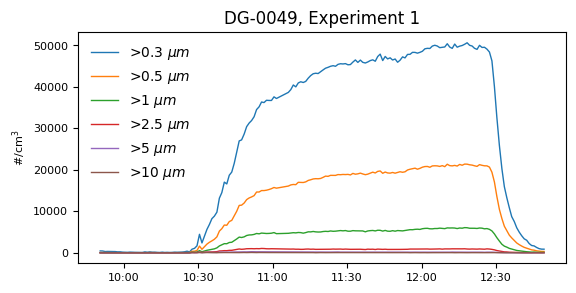

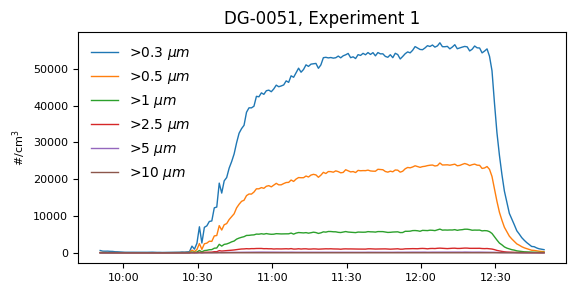

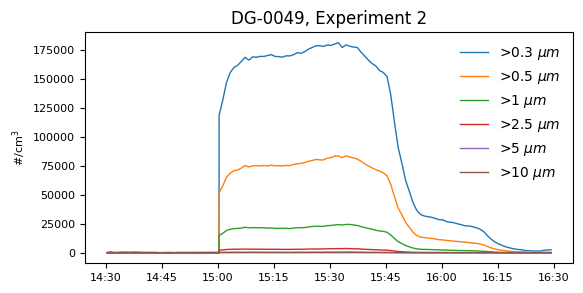

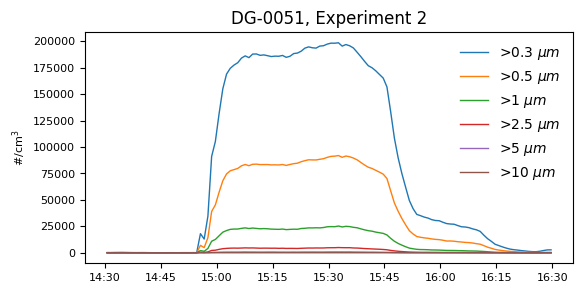

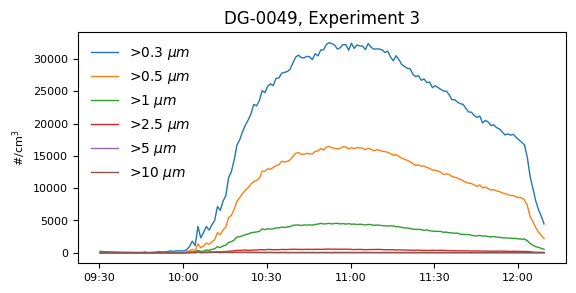

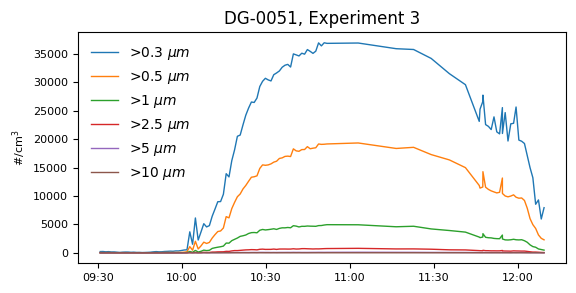

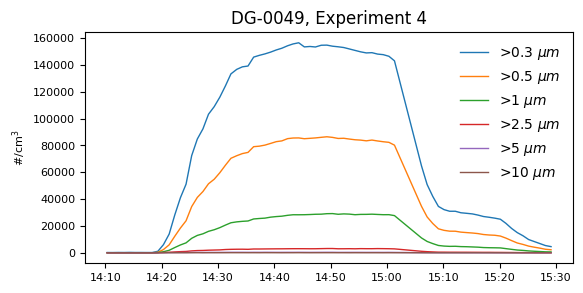

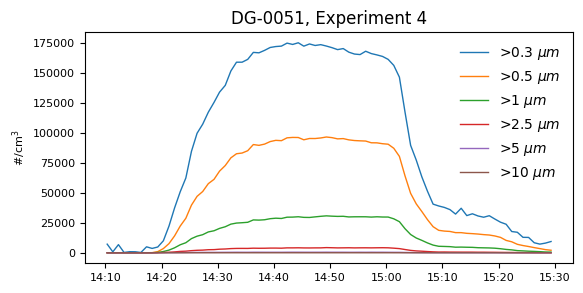

In [92]:
Timestamps_LCS = [['2024-10-16 09:50:00', '2024-10-16 12:50:00'],
                  ['2024-10-16 14:30:00', '2024-10-16 16:30:00'],
                  ['2024-10-17 09:30:00', '2024-10-17 12:10:00'],
                  ['2024-10-17 14:10:00', '2024-10-17 15:30:00']] 


LCS_KU_keys =['DG-0049', 'DG-0051']

for i in range(4): 
    exp_number = str(i+1)
    fig_name = 'LCS_KU_timeseries' + exp_number + '.png'

    fig, ax = plt.subplots(figsize = (6.3,3))

    ax.set_title('DG-0049, Experiment ' + exp_number)

# For 0049 sensor

    plot_LCS_single(ax, data_LCS_KU, LCS_KU_keys[0], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN0.3', '#/cm$^3$', 'timestamp', '>0.3 $\mu m$')
    plot_LCS_single(ax, data_LCS_KU, LCS_KU_keys[0], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN0.5', '#/cm$^3$', 'timestamp', '>0.5 $\mu m$')
    plot_LCS_single(ax, data_LCS_KU, LCS_KU_keys[0], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN1', '#/cm$^3$', 'timestamp', '>1 $\mu m$')
    plot_LCS_single(ax, data_LCS_KU, LCS_KU_keys[0], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN2.5', '#/cm$^3$', 'timestamp', '>2.5 $\mu m$')
    plot_LCS_single(ax, data_LCS_KU, LCS_KU_keys[0], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN5', '#/cm$^3$', 'timestamp', '>5 $\mu m$')
    plot_LCS_single(ax, data_LCS_KU, LCS_KU_keys[0], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN10', '#/cm$^3$', 'timestamp', '>10 $\mu m$')



    fig, ax = plt.subplots(figsize = (6.3,3))

    ax.set_title('DG-0051, Experiment ' + exp_number)

# For 0051 sensor

    plot_LCS_single(ax, data_LCS_KU, LCS_KU_keys[1], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN0.3', '#/cm$^3$', 'timestamp', '>0.3 $\mu m$')
    plot_LCS_single(ax, data_LCS_KU, LCS_KU_keys[1], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN0.5', '#/cm$^3$', 'timestamp', '>0.5 $\mu m$')
    plot_LCS_single(ax, data_LCS_KU, LCS_KU_keys[1], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN1', '#/cm$^3$', 'timestamp', '>1 $\mu m$')
    plot_LCS_single(ax, data_LCS_KU, LCS_KU_keys[1], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN2.5', '#/cm$^3$', 'timestamp', '>2.5 $\mu m$')
    plot_LCS_single(ax, data_LCS_KU, LCS_KU_keys[1], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN5', '#/cm$^3$', 'timestamp', '>5 $\mu m$')
    plot_LCS_single(ax, data_LCS_KU, LCS_KU_keys[1], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN10', '#/cm$^3$', 'timestamp', '>10 $\mu m$')



<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\m'
C:\Users\45404\AppData\Local\Temp\ipykernel_8160\4201619741.py:19: SyntaxWarning: invalid escape sequence '\m'
  plot_LCS_single(ax, data_LCS_OPC500, key, Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN0.3', '#/cm$^3$', 'timestamp', '>0.3 $\mu m$')
C:\Users\45404\AppData\Local\Temp\ipykernel_8160\4201619741.py:20: SyntaxWarning: invalid escape sequence '\m'
  plot_LCS_single(

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased: bool
  backgroundcolor: :mpltype:`color`
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: :mpltype:`color`
  figure: `~matplotlib.figure.Figure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'ext

c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_func

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased: bool
  backgroundcolor: :mpltype:`color`
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: :mpltype:`color`
  figure: `~matplotlib.figure.Figure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'ext

c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_func

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased: bool
  backgroundcolor: :mpltype:`color`
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: :mpltype:`color`
  figure: `~matplotlib.figure.Figure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'ext

c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_func

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased: bool
  backgroundcolor: :mpltype:`color`
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: :mpltype:`color`
  figure: `~matplotlib.figure.Figure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'ext

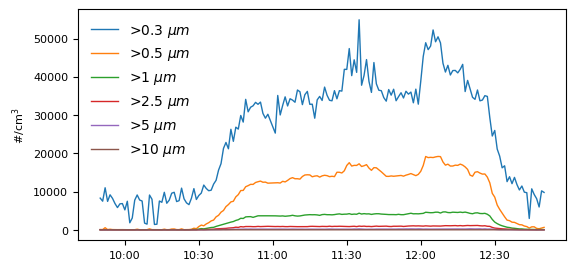

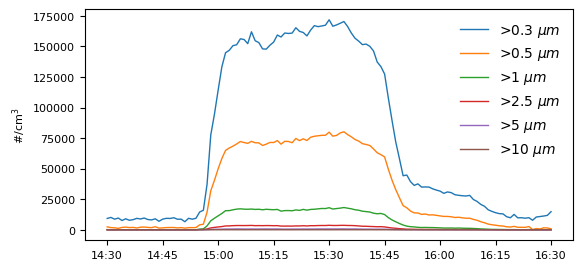

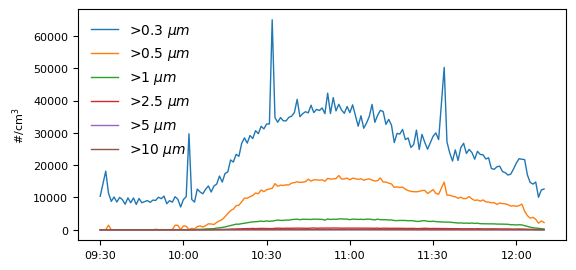

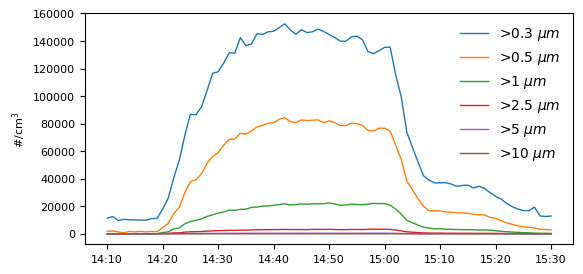

In [93]:
# plot LCS data: OPC500

Timestamps_LCS = [['2024-10-16 09:50:00', '2024-10-16 12:50:00'],
                  ['2024-10-16 14:30:00', '2024-10-16 16:30:00'],
                  ['2024-10-17 09:30:00', '2024-10-17 12:10:00'],
                  ['2024-10-17 14:10:00', '2024-10-17 15:30:00']] 


LCS_dict_keys = ['LCS109_2024-10-16', 'LCS109_2024-10-16','LCS109_2024-10-17','LCS109_2024-10-17'] 

for i, key in enumerate(LCS_dict_keys): 
    exp_number = str(i+1)
    fig_name = 'LCS_OPC500_timeseries' + exp_number + '.png'

    fig, ax = plt.subplots(figsize = (6.3,3))

# For 109 sensor

    plot_LCS_single(ax, data_LCS_OPC500, key, Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN0.3', '#/cm$^3$', 'timestamp', '>0.3 $\mu m$')
    plot_LCS_single(ax, data_LCS_OPC500, key, Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN0.5', '#/cm$^3$', 'timestamp', '>0.5 $\mu m$')
    plot_LCS_single(ax, data_LCS_OPC500, key, Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN1', '#/cm$^3$', 'timestamp', '>1 $\mu m$')
    plot_LCS_single(ax, data_LCS_OPC500, key, Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN2.5', '#/cm$^3$', 'timestamp', '>2.5 $\mu m$')
    plot_LCS_single(ax, data_LCS_OPC500, key, Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN5', '#/cm$^3$', 'timestamp', '>5 $\mu m$')
    plot_LCS_single(ax, data_LCS_OPC500, key, Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN10', '#/cm$^3$', 'timestamp', '>10 $\mu m$')



    fig.savefig(fig_name, dpi = 600)



<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:32: SyntaxWarning: invalid escape sequence '\m'
<>:33: SyntaxWarning: invalid escape sequence '\m'
<>:34: SyntaxWarning: invalid escape sequence '\m'
<>:35: SyntaxWarning: invalid escape sequence '\m'
<>:36: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:22: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:32: SyntaxWarning: invalid escape sequence '\m'
<>:33: SyntaxWarning: invalid escape sequence '\m'
<>:34: SyntaxWarning: invalid escape sequence '\m'
<>:35: SyntaxWarning: invalid escape sequence '\m'
<>:36: SyntaxWarning: invalid e

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased: bool
  backgroundcolor: :mpltype:`color`
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: :mpltype:`color`
  figure: `~matplotlib.figure.Figure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'ext

c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_func

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased: bool
  backgroundcolor: :mpltype:`color`
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: :mpltype:`color`
  figure: `~matplotlib.figure.Figure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'ext

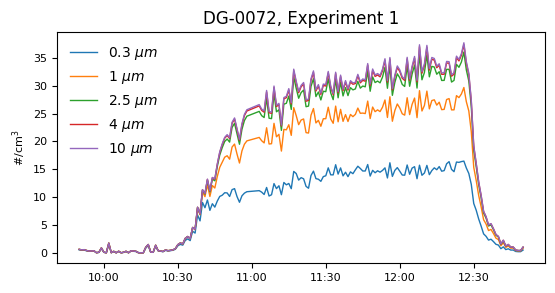

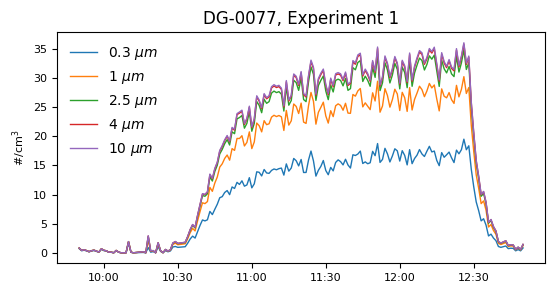

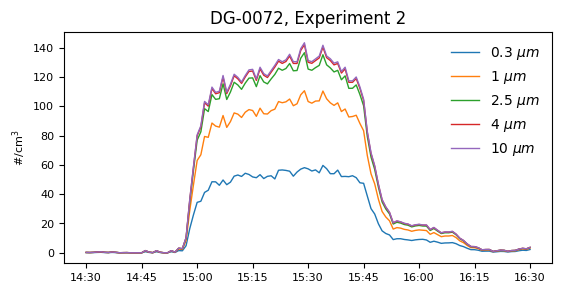

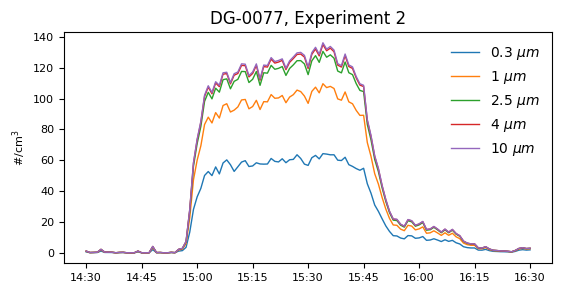

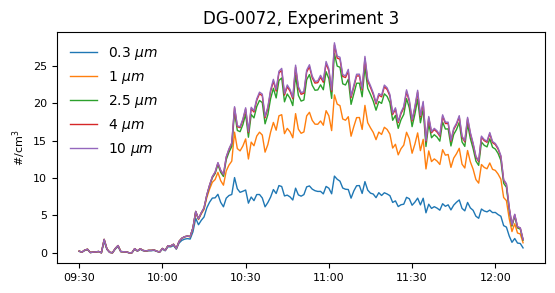

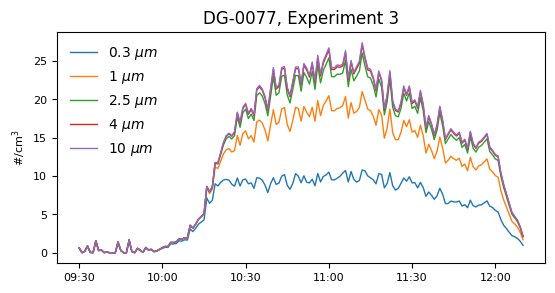

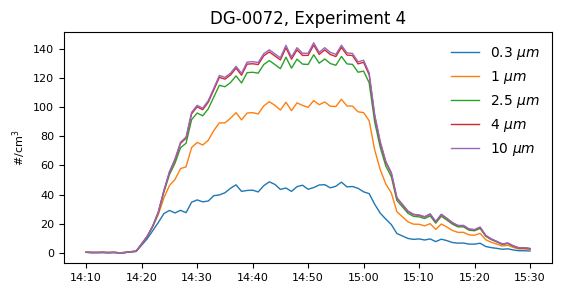

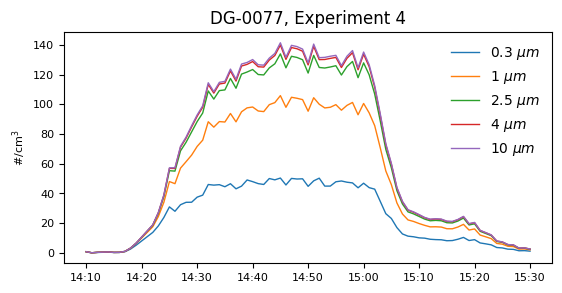

In [99]:
# Plot LCS data: Lund 

Timestamps_LCS = [['2024-10-16 09:50:00', '2024-10-16 12:50:00'],
                  ['2024-10-16 14:30:00', '2024-10-16 16:30:00'],
                  ['2024-10-17 09:30:00', '2024-10-17 12:10:00'],
                  ['2024-10-17 14:10:00', '2024-10-17 15:30:00']] 


LCS_dict_keys = ['DG-0072', 'DG-0077']

for i in range(4):
    date = Timestamps_LCS[i][0].split(' ')[0]
    exp_number = str(i+1)
    fig_name = 'LCS_LUND_timeseries' + exp_number + '.png'

    fig, ax = plt.subplots(figsize = (6.3,3))

    ax.set_title('DG-0072, Experiment ' + exp_number)

    plot_LCS_single(ax, data_LCS_LUND, date + ' ' + LCS_dict_keys[0], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PN0.5, #/m3', '#/cm$^3$', 'Timestamp', '0.3 $\mu m$')
    plot_LCS_single(ax, data_LCS_LUND, date + ' ' + LCS_dict_keys[0], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PN1, #/cm3', '#/cm$^3$', 'Timestamp', '1 $\mu m$')
    plot_LCS_single(ax, data_LCS_LUND, date + ' ' + LCS_dict_keys[0], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PN2.5, #/cm3', '#/cm$^3$', 'Timestamp', '2.5 $\mu m$')
    plot_LCS_single(ax, data_LCS_LUND, date + ' ' + LCS_dict_keys[0], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PN4, #/cm3', '#/cm$^3$', 'Timestamp', '4 $\mu m$') 
    plot_LCS_single(ax, data_LCS_LUND, date + ' ' + LCS_dict_keys[0], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PN10, #/cm3', '#/cm$^3$', 'Timestamp', '10 $\mu m$')
    
   

    fig, ax = plt.subplots(figsize = (6.3,3))

    ax.set_title('DG-0077, Experiment ' + exp_number)

    plot_LCS_single(ax, data_LCS_LUND,  date + ' ' + LCS_dict_keys[1], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PN0.5, #/m3', '#/cm$^3$', 'Timestamp', '0.3 $\mu m$')
    plot_LCS_single(ax, data_LCS_LUND,  date + ' ' + LCS_dict_keys[1], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PN1, #/cm3', '#/cm$^3$', 'Timestamp', '1 $\mu m$')
    plot_LCS_single(ax, data_LCS_LUND,  date + ' ' + LCS_dict_keys[1], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PN2.5, #/cm3', '#/cm$^3$', 'Timestamp', '2.5 $\mu m$')
    plot_LCS_single(ax, data_LCS_LUND,  date + ' ' + LCS_dict_keys[1], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PN4, #/cm3', '#/cm$^3$', 'Timestamp', '4 $\mu m$')
    plot_LCS_single(ax, data_LCS_LUND,  date + ' ' + LCS_dict_keys[1], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PN10, #/cm3', '#/cm$^3$', 'Timestamp', '10 $\mu m$')



    # fig.savefig(fig_name, dpi = 600)


<>:43: SyntaxWarning: invalid escape sequence '\m'
<>:75: SyntaxWarning: invalid escape sequence '\m'
<>:107: SyntaxWarning: invalid escape sequence '\m'
<>:139: SyntaxWarning: invalid escape sequence '\m'
<>:170: SyntaxWarning: invalid escape sequence '\m'
<>:201: SyntaxWarning: invalid escape sequence '\m'
<>:43: SyntaxWarning: invalid escape sequence '\m'
<>:75: SyntaxWarning: invalid escape sequence '\m'
<>:107: SyntaxWarning: invalid escape sequence '\m'
<>:139: SyntaxWarning: invalid escape sequence '\m'
<>:170: SyntaxWarning: invalid escape sequence '\m'
<>:201: SyntaxWarning: invalid escape sequence '\m'
C:\Users\45404\AppData\Local\Temp\ipykernel_8160\3840006636.py:43: SyntaxWarning: invalid escape sequence '\m'
  fig.suptitle('0.3 $\mu m$')
C:\Users\45404\AppData\Local\Temp\ipykernel_8160\3840006636.py:75: SyntaxWarning: invalid escape sequence '\m'
  fig.suptitle('0.5 $\mu m$')
C:\Users\45404\AppData\Local\Temp\ipykernel_8160\3840006636.py:107: SyntaxWarning: invalid escape 

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased: bool
  backgroundcolor: :mpltype:`color`
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: :mpltype:`color`
  figure: `~matplotlib.figure.Figure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'ext

c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_f

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased: bool
  backgroundcolor: :mpltype:`color`
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: :mpltype:`color`
  figure: `~matplotlib.figure.Figure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'ext

c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_f

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased: bool
  backgroundcolor: :mpltype:`color`
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: :mpltype:`color`
  figure: `~matplotlib.figure.Figure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'ext

c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_f

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased: bool
  backgroundcolor: :mpltype:`color`
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: :mpltype:`color`
  figure: `~matplotlib.figure.Figure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'ext

c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_f

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased: bool
  backgroundcolor: :mpltype:`color`
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: :mpltype:`color`
  figure: `~matplotlib.figure.Figure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'ext

c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_functions.py:98: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  time = pd.to_datetime(data_dict[dict_key][timelabel])
c:\Users\45404\Documents\NFA\Master Thesis\GitHub\Master-thesis\plot_f

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased: bool
  backgroundcolor: :mpltype:`color`
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: :mpltype:`color`
  figure: `~matplotlib.figure.Figure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'ext

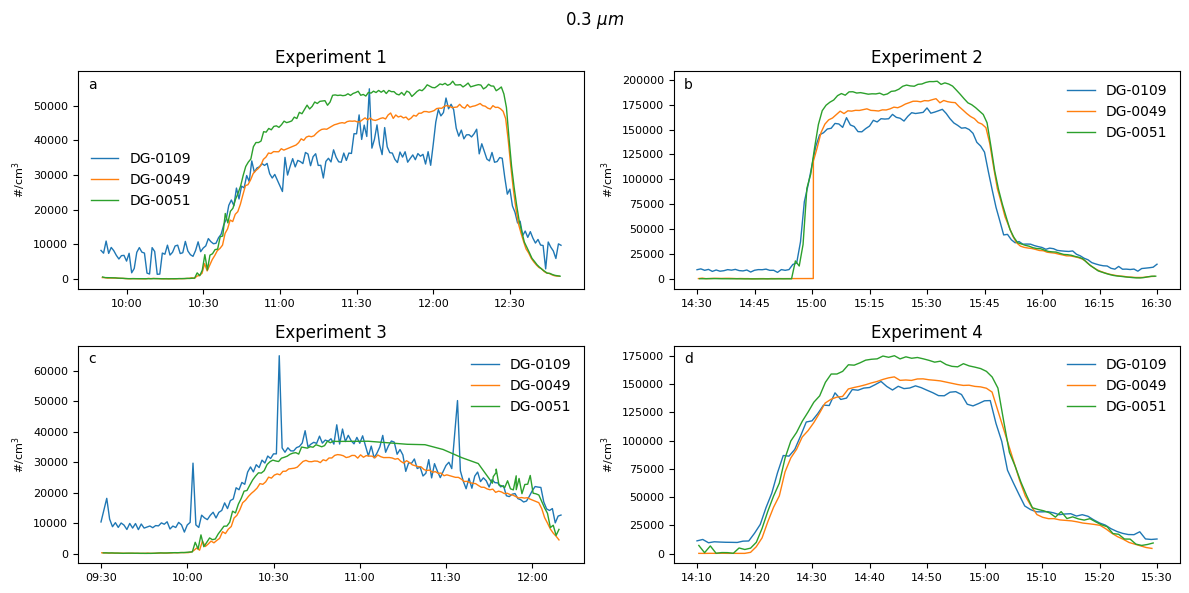

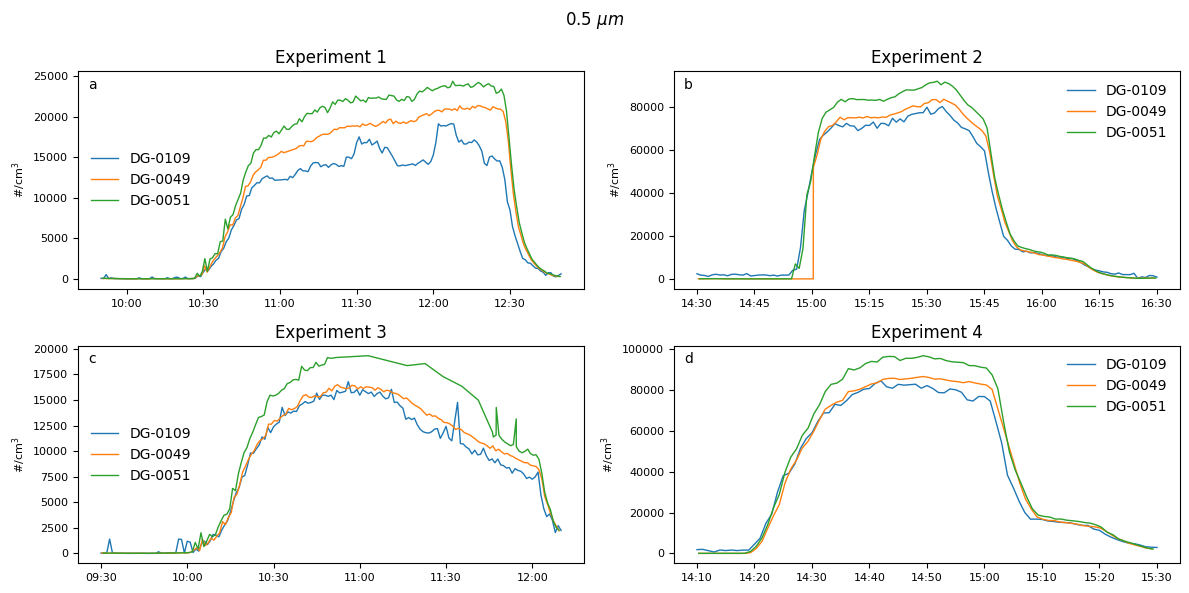

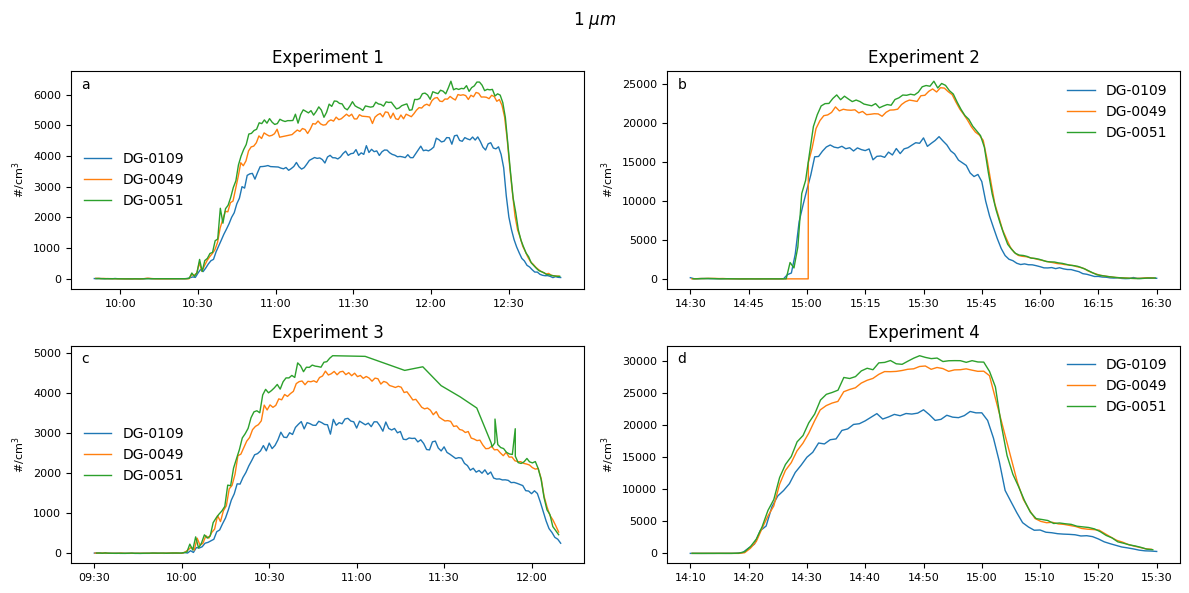

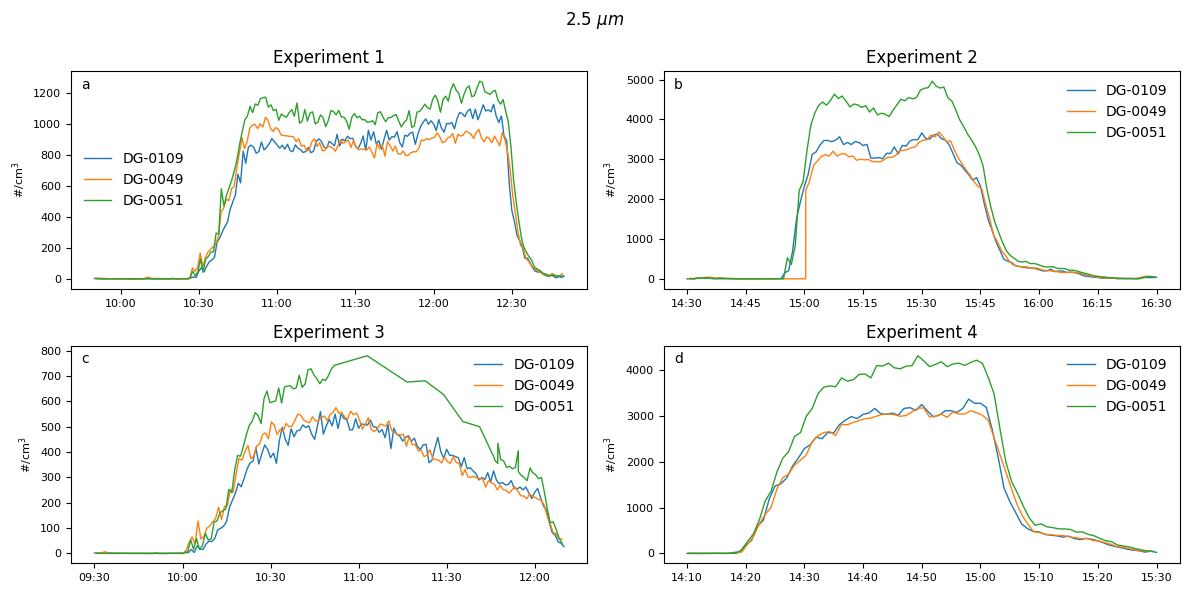

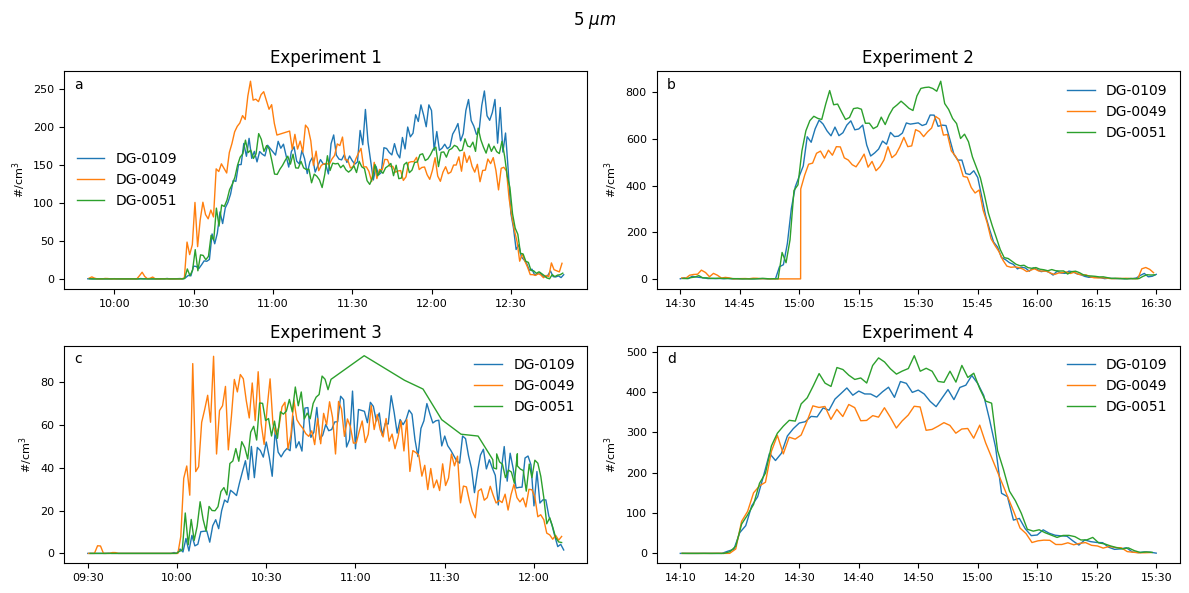

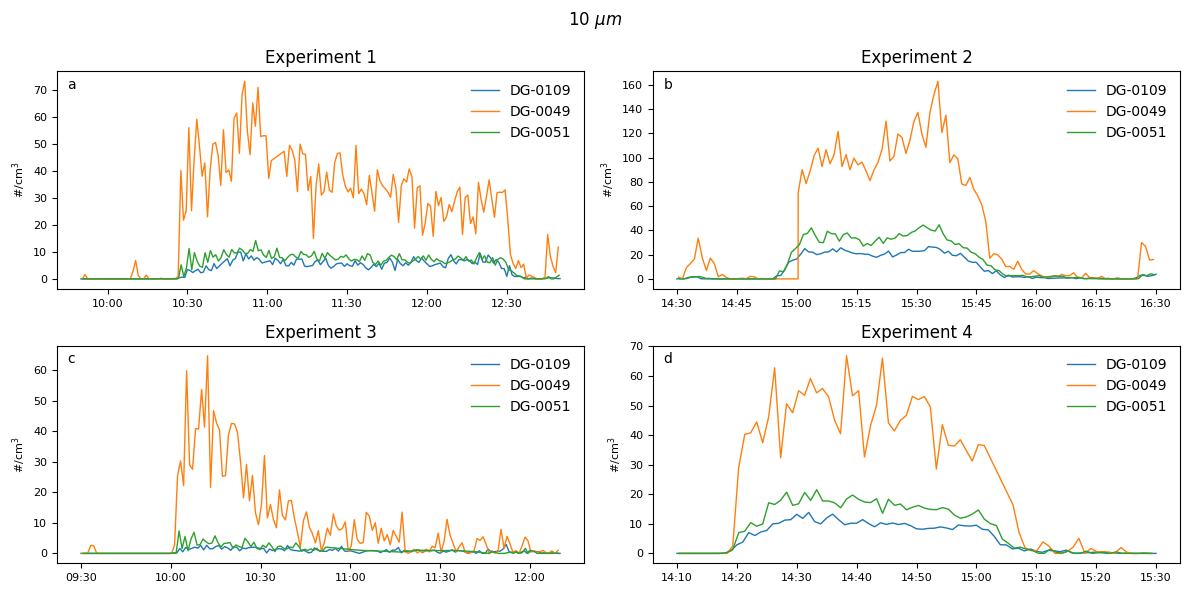

In [95]:
# KU + OPC5000 sensor 



Timestamps_LCS = [['2024-10-16 09:50:00', '2024-10-16 12:50:00'],
                  ['2024-10-16 14:30:00', '2024-10-16 16:30:00'],
                  ['2024-10-17 09:30:00', '2024-10-17 12:10:00'],
                  ['2024-10-17 14:10:00', '2024-10-17 15:30:00']] 


LCS_dict_keys = ['LCS109_2024-10-16', 'LCS109_2024-10-16','LCS109_2024-10-17','LCS109_2024-10-17'] 

LCS_KU_keys =['DG-0049', 'DG-0051']



fig, axes = plt.subplots(2, 2, figsize = (12, 6))

for i in range(4):
    if i == 0:
        ax = axes[0][0]
    if i == 1:
        ax = axes[0][1]
    if i == 2:
        ax = axes[1][0]
    if i == 3:
        ax = axes[1][1]

# For 0.3 


    plot_LCS_single(ax, data_LCS_OPC500, LCS_dict_keys[i], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN0.3', '#/cm$^3$', 'timestamp', 'DG-0109')
    plot_LCS_single(ax, data_LCS_KU, LCS_KU_keys[0], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN0.3', '#/cm$^3$', 'timestamp', 'DG-0049')
    plot_LCS_single(ax, data_LCS_KU, LCS_KU_keys[1], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN0.3', '#/cm$^3$', 'timestamp', 'DG-0051')

    title = 'Experiment ' + str(i + 1)
    ax.set_title(title)

sublabels = ['a', 'b', 'c', 'd']
for ax, l in zip(axes.flatten(), sublabels):
    ax.text(0.02, 0.92, l, transform = ax.transAxes, fontsize = 10)

fig.suptitle('0.3 $\mu m$')
fig.tight_layout()
fig.savefig('Timeseries_LCS_0.3.png', dpi = 600)


# For 0.5 



fig, axes = plt.subplots(2, 2, figsize = (12, 6))

for i in range(4):
    if i == 0:
        ax = axes[0][0]
    if i == 1:
        ax = axes[0][1]
    if i == 2:
        ax = axes[1][0]
    if i == 3:
        ax = axes[1][1]

    plot_LCS_single(ax, data_LCS_OPC500, LCS_dict_keys[i], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN0.5', '#/cm$^3$', 'timestamp', 'DG-0109')
    plot_LCS_single(ax, data_LCS_KU, LCS_KU_keys[0], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN0.5', '#/cm$^3$', 'timestamp', 'DG-0049')
    plot_LCS_single(ax, data_LCS_KU, LCS_KU_keys[1], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN0.5', '#/cm$^3$', 'timestamp', 'DG-0051')

    title = 'Experiment ' + str(i + 1)
    ax.set_title(title)

sublabels = ['a', 'b', 'c', 'd']
for ax, l in zip(axes.flatten(), sublabels):
    ax.text(0.02, 0.92, l, transform = ax.transAxes, fontsize = 10)

fig.suptitle('0.5 $\mu m$')
fig.tight_layout()
fig.savefig('Timeseries_LCS_0.5.png', dpi = 600)


# For 1 



fig, axes = plt.subplots(2, 2, figsize = (12, 6))

for i in range(4):
    if i == 0:
        ax = axes[0][0]
    if i == 1:
        ax = axes[0][1]
    if i == 2:
        ax = axes[1][0]
    if i == 3:
        ax = axes[1][1]

    plot_LCS_single(ax, data_LCS_OPC500, LCS_dict_keys[i], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN1', '#/cm$^3$', 'timestamp', 'DG-0109')
    plot_LCS_single(ax, data_LCS_KU, LCS_KU_keys[0], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN1', '#/cm$^3$', 'timestamp', 'DG-0049')
    plot_LCS_single(ax, data_LCS_KU, LCS_KU_keys[1], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN1', '#/cm$^3$', 'timestamp', 'DG-0051')

    title = 'Experiment ' + str(i + 1)
    ax.set_title(title)

sublabels = ['a', 'b', 'c', 'd']
for ax, l in zip(axes.flatten(), sublabels):
    ax.text(0.02, 0.92, l, transform = ax.transAxes, fontsize = 10)

fig.suptitle('1 $\mu m$')
fig.tight_layout()
fig.savefig('Timeseries_LCS_1.png', dpi = 600)


# For 2.5 



fig, axes = plt.subplots(2, 2, figsize = (12, 6))

for i in range(4):
    if i == 0:
        ax = axes[0][0]
    if i == 1:
        ax = axes[0][1]
    if i == 2:
        ax = axes[1][0]
    if i == 3:
        ax = axes[1][1]

    plot_LCS_single(ax, data_LCS_OPC500, LCS_dict_keys[i], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN2.5', '#/cm$^3$', 'timestamp', 'DG-0109')
    plot_LCS_single(ax, data_LCS_KU, LCS_KU_keys[0], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN2.5', '#/cm$^3$', 'timestamp', 'DG-0049')
    plot_LCS_single(ax, data_LCS_KU, LCS_KU_keys[1], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN2.5', '#/cm$^3$', 'timestamp', 'DG-0051')

    title = 'Experiment ' + str(i + 1)
    ax.set_title(title)

sublabels = ['a', 'b', 'c', 'd']
for ax, l in zip(axes.flatten(), sublabels):
    ax.text(0.02, 0.92, l, transform = ax.transAxes, fontsize = 10)

fig.suptitle('2.5 $\mu m$')
fig.tight_layout()
fig.savefig('Timeseries_LCS_2.5.png', dpi = 600)

# For 5 



fig, axes = plt.subplots(2, 2, figsize = (12, 6))

for i in range(4):
    if i == 0:
        ax = axes[0][0]
    if i == 1:
        ax = axes[0][1]
    if i == 2:
        ax = axes[1][0]
    if i == 3:
        ax = axes[1][1]

    plot_LCS_single(ax, data_LCS_OPC500, LCS_dict_keys[i], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN5', '#/cm$^3$', 'timestamp', 'DG-0109')
    plot_LCS_single(ax, data_LCS_KU, LCS_KU_keys[0], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN5', '#/cm$^3$', 'timestamp', 'DG-0049')
    plot_LCS_single(ax, data_LCS_KU, LCS_KU_keys[1], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN5', '#/cm$^3$', 'timestamp', 'DG-0051')

    title = 'Experiment ' + str(i + 1)
    ax.set_title(title)

sublabels = ['a', 'b', 'c', 'd']
for ax, l in zip(axes.flatten(), sublabels):
    ax.text(0.02, 0.92, l, transform = ax.transAxes, fontsize = 10)

fig.suptitle('5 $\mu m$')
fig.tight_layout()
fig.savefig('Timeseries_LCS_5.png', dpi = 600)

# For 10 



fig, axes = plt.subplots(2, 2, figsize = (12, 6))

for i in range(4):
    if i == 0:
        ax = axes[0][0]
    if i == 1:
        ax = axes[0][1]
    if i == 2:
        ax = axes[1][0]
    if i == 3:
        ax = axes[1][1]

    plot_LCS_single(ax, data_LCS_OPC500, LCS_dict_keys[i], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN10', '#/cm$^3$', 'timestamp', 'DG-0109')
    plot_LCS_single(ax, data_LCS_KU, LCS_KU_keys[0], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN10', '#/cm$^3$', 'timestamp', 'DG-0049')
    plot_LCS_single(ax, data_LCS_KU, LCS_KU_keys[1], Timestamps_LCS[i][0], Timestamps_LCS[i][1], 'PM5000S_2_PN10', '#/cm$^3$', 'timestamp', 'DG-0051')

    title = 'Experiment ' + str(i + 1)
    ax.set_title(title)

sublabels = ['a', 'b', 'c', 'd']
for ax, l in zip(axes.flatten(), sublabels):
    ax.text(0.02, 0.92, l, transform = ax.transAxes, fontsize = 10)

fig.suptitle('10 $\mu m$')
fig.tight_layout()
fig.savefig('Timeseries_LCS_10.png', dpi = 600)





In [96]:
# Bins for KU and OPC500

print(data_LCS_OPC500['LCS109_2024-10-16']['PM5000S_2_PN0.3'])

0       5347.060059
1       5226.548828
2       5091.646973
3       5274.313965
4       5468.529297
           ...     
773    20257.863280
774    20711.160160
775    20278.156250
776    20574.097660
777    19974.214840
Name: PM5000S_2_PN0.3, Length: 778, dtype: float64


In [112]:
# Bins for OPC5000:

dict_keys_OPC5000 = ['LCS109_2024-10-16', 'LCS109_2024-10-17']
new_keys_OPC5000 = ['PN0_5', 'PN1', 'PN2_5', 'PN5', 'PN10']
old_keys_OPC5000 = ['PM5000S_2_PN0.3', 'PM5000S_2_PN0.5', 'PM5000S_2_PN1', 'PM5000S_2_PN2.5', 'PM5000S_2_PN5', 'PM5000S_2_PN10']


for key in dict_keys_OPC5000:
    for i in range(len(new_keys_OPC5000)):  
        data_LCS_OPC500[key][new_keys_OPC5000[i]] = (data_LCS_OPC500[key][old_keys_OPC5000[i]] - data_LCS_OPC500[key][old_keys_OPC5000[i+1]])

    data_LCS_OPC500[key]['PN<1'] = data_LCS_OPC500[key].iloc[:44:50].sum(axis=1)
    data_LCS_OPC500[key]['PN<2.5'] = data_LCS_OPC500[key].iloc[:44:50+1].sum(axis=1)
    data_LCS_OPC500[key]['PN<4'] = data_LCS_OPC500[key].iloc[:44:50+2].sum(axis=1)
    data_LCS_OPC500[key]['PN<10'] = data_LCS_OPC500[key].iloc[:44:50+3].sum(axis=1)


# Bins for KU:

dict_keys_KU = ['DG-0049', 'DG-0051']
new_keys_KU = ['PN0_5', 'PN1', 'PN2_5', 'PN5', 'PN10']
old_keys_KU = ['PM5000S_2_PN0.3', 'PM5000S_2_PN0.5', 'PM5000S_2_PN1', 'PM5000S_2_PN2.5', 'PM5000S_2_PN5', 'PM5000S_2_PN10']


for key in dict_keys_KU:
    for i in range(len(new_keys_KU)):  
        data_LCS_KU[key][new_keys_KU[i]] = (data_LCS_KU[key][old_keys_KU[i]] - data_LCS_KU[key][old_keys_KU[i+1]])


# Bins for Lund: 



dict_keys_Lund = ['2024-10-16 DG-0072', '2024-10-17 DG-0072', '2024-10-16 DG-0077', '2024-10-17 DG-0072']
new_keys_Lund = ['PN1', 'PN2_5', 'PN5', 'PN10']
old_keys_Lund = ['PN0.5, #/m3', 'PN1, #/cm3', 'PN2.5, #/cm3', 'PN4, #/cm3', 'PN10, #/cm3']


for key in dict_keys_Lund:
    for i in range(len(new_keys_Lund)):  
        data_LCS_LUND[key][new_keys_Lund[i]] = (data_LCS_LUND[key][old_keys_Lund[i+1]] - data_LCS_LUND[key][old_keys_Lund[i]])




TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [111]:
print(data_LCS_OPC500)

{'LCS109_2024-10-14':      Unnamed: 0         timestamp  ALEC1_AE1  ALEC1_AE2  ALEC1_DE1  ALEC1_DE2  \
0             0  14/10/2024 15:00   3.389050   1.338551  -3.389050  -0.009880   
1             1  14/10/2024 15:01   3.388215   1.353063  -3.388215  -0.006513   
2             2  14/10/2024 15:02   3.389307   1.361647  -3.389307  -0.005455   
3             3  14/10/2024 15:03   3.389424   1.367397  -3.389424  -0.004666   
4             4  14/10/2024 15:04   3.389360   1.373845  -3.389360  -0.003933   
..          ...               ...        ...        ...        ...        ...   
295         295  14/10/2024 19:55   1.453130   1.408355   0.338830  -0.003972   
296         296  14/10/2024 19:56   1.450521   1.407920   0.339559  -0.004253   
297         297  14/10/2024 19:57   1.455195   1.408384   0.340405  -0.004107   
298         298  14/10/2024 19:58   1.450116   1.407777   0.339313  -0.004169   
299         299  14/10/2024 19:59   1.452004   1.408025   0.340187  -0.004043   

     

In [ ]:
# Bins for OPC5000

PN_05 = data_LCS_OPC500['LCS109_2024-10-16']['PM5000S_2_PN0.3'] - data_LCS_OPC500['LCS109_2024-10-16']['PM5000S_2_PN0.5']
PN_1 = data_LCS_OPC500['LCS109_2024-10-16']['PM5000S_2_PN0.5'] - data_LCS_OPC500['LCS109_2024-10-16']['PM5000S_2_PN1']
PN_25 = data_LCS_OPC500['LCS109_2024-10-16']['PM5000S_2_PN1'] - data_LCS_OPC500['LCS109_2024-10-16']['PM5000S_2_PN2.5']
PN_5 = data_LCS_OPC500['LCS109_2024-10-16']['PM5000S_2_PN2.5'] - data_LCS_OPC500['LCS109_2024-10-16']['PM5000S_2_PN5']
PN_10 = data_LCS_OPC500['LCS109_2024-10-16']['PM5000S_2_PN5'] - data_LCS_OPC500['LCS109_2024-10-16']['PM5000S_2_PN10']


